In [1]:
import string
text = open('matter.txt').read()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import LancasterStemmer
lst= LancasterStemmer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [2]:
# Taking words and respective emotions from emotions.txt file and storing in seperate lists

emotions = open('emotions.txt',encoding='utf-8').read()
sample = emotions.replace('\n', '')
sample1 = sample.split(',')
sample2 = []
for line in sample1:
    sample2.append(line.strip())

sample3 = []
for line in sample2:
    sample3.append(line.split(':'))

sample4 = []
for line1 in sample3:
    for line in line1:
        sample4.append(line.strip())

sample5 = []
for word in sample4:
    sample5.append(word.replace("'", ""))

words_list = []
emotions_list = []
i = 0
for word in sample5:
    if i == 0:
        words_list.append(word)
        i = 1
    elif i == 1:
        emotions_list.append(word)
        i = 0
     
        
     


In [3]:
stemmed_words_list=[]
for words in words_list:
    stemmed_words_list.append(lst.stem(words))


In [4]:
i=0
sarcasm= []
oppemo = []
sent1 = open("oppemo.txt",encoding="utf-8").read()
sent2 = sent1.split('\n')
for word in sent2 :
    if i==0 :
        i=1
        sarcasm.append(word)
    elif i==1 :
        i=0
        oppemo.append(word)

In [5]:
from nltk.tokenize import sent_tokenize

lower_sen = text.lower()
sents= sent_tokenize(lower_sen)

count=0

divi1 = ''
divi2 = ''
final_sen = ''
for sent in sents :
    toke = word_tokenize(sent)
    for i in range (0,int(len(toke)/2)) :
        divi1 += toke[i]
        divi1 += ' '
    for i in range (int(len(toke)/2),int(len(toke))) :
        divi2 += toke[i]
        divi2 += ' '
    sen_divi1 = SentimentIntensityAnalyzer().polarity_scores(divi1)
    sen_divi2 = SentimentIntensityAnalyzer().polarity_scores(divi2)
    if sen_divi1['compound']>sen_divi2['compound'] and sen_divi2['compound']!=0 :
        tokes = word_tokenize(divi1)
        for tok in tokes :
            if SentimentIntensityAnalyzer().polarity_scores(tok) ['pos']==1 :
                if lst.stem(tok) in stemmed_words_list :
                    emotion = emotions_list[stemmed_words_list.index(lst.stem(tok))]
                    final_sen += oppemo[sarcasm.index(emotion)]
                    final_sen += ' '
                else :
                    final_sen += tok
                    final_sen += ' '
            else :
                final_sen += tok
                final_sen += ' '
        final_sen += divi2
        
        lower_sen = lower_sen.replace(sent,final_sen)
        
    
       
        final_sen = ''
        count += 1
        
    divi1 = ''
    divi2 = ''


In [6]:
cleaned_text = lower_sen.translate(str.maketrans('','',string.punctuation))
tokenized_words= word_tokenize(cleaned_text)

In [7]:
abbreviations = open('abbrevations.txt',encoding='utf-8').read()
abbrev_low = abbreviations.lower()
abbrev = abbrev_low.split('\n')

In [8]:
filter_list = []
mean_list = []
i=0
for word in abbrev :
    if i==0:
        filter_list.append(word)
        i=1
    elif i==1:
        mean_list.append(word)
        i=0

i=-1
for line in mean_list :
    test= word_tokenize(line)
    i+=1
    for word in test :
        if lst.stem(word) in stemmed_words_list :
            ind = stemmed_words_list.index(lst.stem(word))
            mean_list[i] = emotions_list[ind]

In [13]:
i=-1
for word in tokenized_words:
    i+=1
    if word in filter_list :
        fli = filter_list.index(word)
        tokenized_words[i]= mean_list[fli]
        
        
final_words=[]
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [10]:
stemmed_text=[]

for words in final_words:
    stemmed_text.append(lst.stem(words))

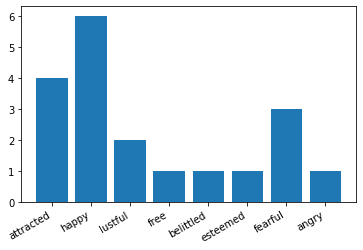

In [11]:
analyzed_emotions_stem=[]
for word in stemmed_text:
    if word in stemmed_words_list:
        index=stemmed_words_list.index(word)
        analyzed_emotions_stem.append(emotions_list[index])
        
emotion_count_stem=Counter(analyzed_emotions_stem)


fig, ax1 = plt.subplots()
ax1.bar(emotion_count_stem.keys(), emotion_count_stem.values())
fig.autofmt_xdate()
plt.show()